# 다음 분기에 어떤 게임을 설계해야 할까


1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [ ]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 데이터 정리

### 기본 데이터 정리 / 결측치, 타입

In [ ]:
df=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 인덱스 정리
df=df.iloc[:,1:]

In [ ]:
# 결측치 확인
pd.isnull(df).sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 일단 결측치는 제거하는 방향으로 // 일부는 살릴수있지만

df=df.dropna(axis=0)
df=df.reset_index(drop=True)
pd.isnull(df).sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
#데이터들의 타입 확인
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
# year 처리 데이터 타입을 int64 변경 및 데이터의 값 확인

df['Year']=df['Year'].astype('int64')
df['Year'].dtypes

dtype('int64')

In [ ]:
df = df.sort_values(by=df.columns[2],ascending=True)
df.Year

9094        0
16042       0
14352       0
2206        1
8507        1
         ... 
1758     2016
9911     2017
5196     2017
14903    2017
6765     2020
Name: Year, Length: 16241, dtype: int64

In [ ]:
# 연도가 십의 자리까지만 있는 항목 개수 확인

print(sum(df['Year']<1000))
print(sum(df['Year']<100))

100
100


In [ ]:
# 23보다 작으면 2000을 더함 2023 / 100보다 작으면 1900을 더함 1999
df.loc[df['Year'] < 23, 'Year'] = df['Year']+2000
df.loc[df['Year'] < 100, 'Year'] = df['Year']+1900
print(sum(df['Year']>1000))

16241


In [ ]:
# 판매량 데이터 확인 -> 단위 조정 및 문자열(K M) 제거. 백만단위로(Million) 통일 작업

df = df.sort_values(by=df.columns[5],ascending=False)
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13504,King of Clubs: Mini Golf,Wii,2008,Sports,Oxygen Interactive,90K,0,0,0.01
14039,Animal Planet: Vet Life,Wii,2009,Simulation,Activision,90K,0,0,0.01
12783,Mark Davis Pro Bass Challenge,PS2,2002,Sports,Natsume,90K,0.07,0,0.02
10438,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92
6119,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63M,5.31,0.06,1.38
14540,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46
14355,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57
10681,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79
10914,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11,1.93,2.75


In [ ]:
sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in sales:
    df1=df[~df[i].str.contains('K')].copy()
    df2=df[df[i].str.contains('K')].copy()
    df1[i] = df1[i].apply(lambda x: float(x.replace('M', '')))
    df2[i] = df2[i].apply(lambda x: float(x.replace('K', ''))*0.001)
    df=pd.concat([df1,df2],axis=0)

df=df.reset_index(drop=True)
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92
1,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38
3,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46
4,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57


In [ ]:
# 추후 편리함을 위해 전체 판매량(Total_Sales)을 추가
df['Total_Sales']=df[sales].sum(axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
1,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
4,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


In [ ]:
# 잘못된 데이터 제거 / 뒤에서 시각화 작업중 발견한 오류
df=df[~df['Name'].str.contains('Strongest Tokyo University Shogi DS')]

In [ ]:
# 최종적으로 정리된 데이터를 vgame로 재선언
vgame=df
vgame.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
1,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
4,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


### 최근 10년 데이터를 따로 정의

In [ ]:
# 최근 자료 정리 (2007~2016)

vgame_y=(vgame['Year']>1999)
vgame_y=df[vgame_y]
vgame_y=vgame_y.reset_index(drop=True)
vgame_y.Year.value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
2000     348
2016     342
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
#일부 연도의 데이터량이 적음을 확인 최근 데이터를 2016년도까지로 정함
vgame_2000=vgame_y.Year.value_counts()

In [ ]:
vgame_2000=vgame_2000.reset_index()
vgame_2000.columns=['Year','Count']
vgame_2000=vgame_2000.sort_values(by=vgame_2000.columns[0],ascending=True)
vgame_2000=vgame_2000.reset_index(drop=True)

In [ ]:
vgame_2000

,Year,Count
0,2000,348
1,2001,480
2,2002,826
3,2003,774
4,2004,740
5,2005,934
6,2006,1005
7,2007,1195
8,2008,1423
9,2009,1428


In [ ]:
# 기존자료에서 비교적 데이터 수가 적은 2017~2020 데이터를 제외 & 2007~2016 10년 자료를 최신자료로 선택

vgame=(vgame['Year']< 2017)
vgame=df[vgame]
vgame=vgame.reset_index(drop=True)
vgame.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
1,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
4,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


In [ ]:
# 최근 10년 자료만 선택 (2007~2016)
vgame_10y=(df['Year']>2006) & (df['Year']< 2017)
vgame_10y=df[vgame_10y]
vgame_10y=vgame_10y.reset_index(drop=True)

In [ ]:
vgame_10y.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
3,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72


In [ ]:
# 최종적 준비된 자료 / vgame (전체 Year) / vgame_10y (2007~2016)

## 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

### 지역별로 팔린 장르의 수 확인

In [ ]:
vgame01=vgame.groupby('Genre').sum()
vgame01.drop(['Year'],axis=1, inplace=True)
vgame01=vgame01.reset_index()
vgame01

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,858.75,513.64,156.57,183.99,1712.95
1,Adventure,101.79,63.66,51.87,16.70,234.02
2,Fighting,220.35,99.90,87.14,36.15,443.54
3,Misc,394.73,208.15,104.18,72.64,779.70
4,Platform,445.38,200.63,130.53,51.45,827.99
5,Puzzle,121.58,50.47,56.24,12.44,240.73
6,Racing,354.70,235.02,56.32,76.51,722.55
7,Role-Playing,318.76,183.09,342.89,56.73,901.47
8,Shooter,574.48,310.23,38.18,101.86,1024.75
9,Simulation,181.16,112.99,63.54,31.30,388.99


In [ ]:
vgame012=vgame01.T
vgame012=vgame012.rename(columns=vgame012.iloc[0])
vgame012= vgame012.drop(vgame012.index[0])
vgame012=vgame012.drop(['Total_Sales'])
vgame012

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.7,318.76,574.48,181.16,667.26,67.83
EU_Sales,513.64,63.66,99.9,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.57,51.87,87.14,104.18,130.53,56.24,56.32,342.89,38.18,63.54,134.76,49.1
Other_Sales,183.99,16.7,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.3,132.35,11.23


#### 2-Sample Chi Square Test 를통해 지역별로 선호하는 장르의 차이가 유의미한지 확인 및 시각화

In [ ]:
# 2-sample chi square test
from scipy.stats import chi2_contingency
print('P-value =',chi2_contingency(vgame012)[1])

P-value = 9.857841074184083e-123


p값이 작으므로 지역에따라 선호하는 게임의 장르는 무관하다는 가설을 기각 지역에따라 선호하는 장르가 다르다.

In [ ]:
# 그래프 분포를 편하게 보기 위해 평균값으로 변환
vgame013=pd.DataFrame()

vgame013['Genre']=vgame01['Genre']
vgame013['NA_Sales']=vgame01['NA_Sales']/(vgame01['NA_Sales'].sum())
vgame013['EU_Sales']=vgame01['EU_Sales']/vgame01['EU_Sales'].sum()
vgame013['JP_Sales']=vgame01['JP_Sales']/(vgame01['JP_Sales'].sum())
vgame013['Other_Sales']=vgame01['Other_Sales']/(vgame01['Other_Sales'].sum())
vgame013['Total_Sales']=vgame01['Total_Sales']/(vgame01['Total_Sales'].sum())
vgame013    

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,0.199395,0.214592,0.123155,0.234876,0.195654
1,Adventure,0.023635,0.026596,0.040800,0.021319,0.026730
2,Fighting,0.051164,0.041737,0.068543,0.046148,0.050661
3,Misc,0.091653,0.086962,0.081946,0.092730,0.089058
4,Platform,0.103414,0.083820,0.102673,0.065679,0.094573
5,Puzzle,0.028230,0.021086,0.044237,0.015881,0.027496
6,Racing,0.082359,0.098188,0.044300,0.097670,0.082530
7,Role-Playing,0.074014,0.076492,0.269712,0.072420,0.102966
8,Shooter,0.133390,0.129610,0.030032,0.130031,0.117047
9,Simulation,0.042064,0.047206,0.049980,0.039957,0.044431


In [ ]:
vgame013=vgame013.melt(id_vars='Genre',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])#,'Total_Sales2'])
vgame013 = vgame013.sort_values(by=vgame013.columns[2],ascending=False)
vgame013 = vgame013.sort_values(by=vgame013.columns[0],ascending=True)
vgame013=vgame013.reset_index(drop=True)
vgame013.columns=['Genre','Region','Mean_Sales']
vgame013.head()

,Genre,Region,Mean_Sales
0,Action,Other_Sales,0.234876
1,Action,EU_Sales,0.214592
2,Action,NA_Sales,0.199395
3,Action,JP_Sales,0.123155
4,Adventure,JP_Sales,0.040800


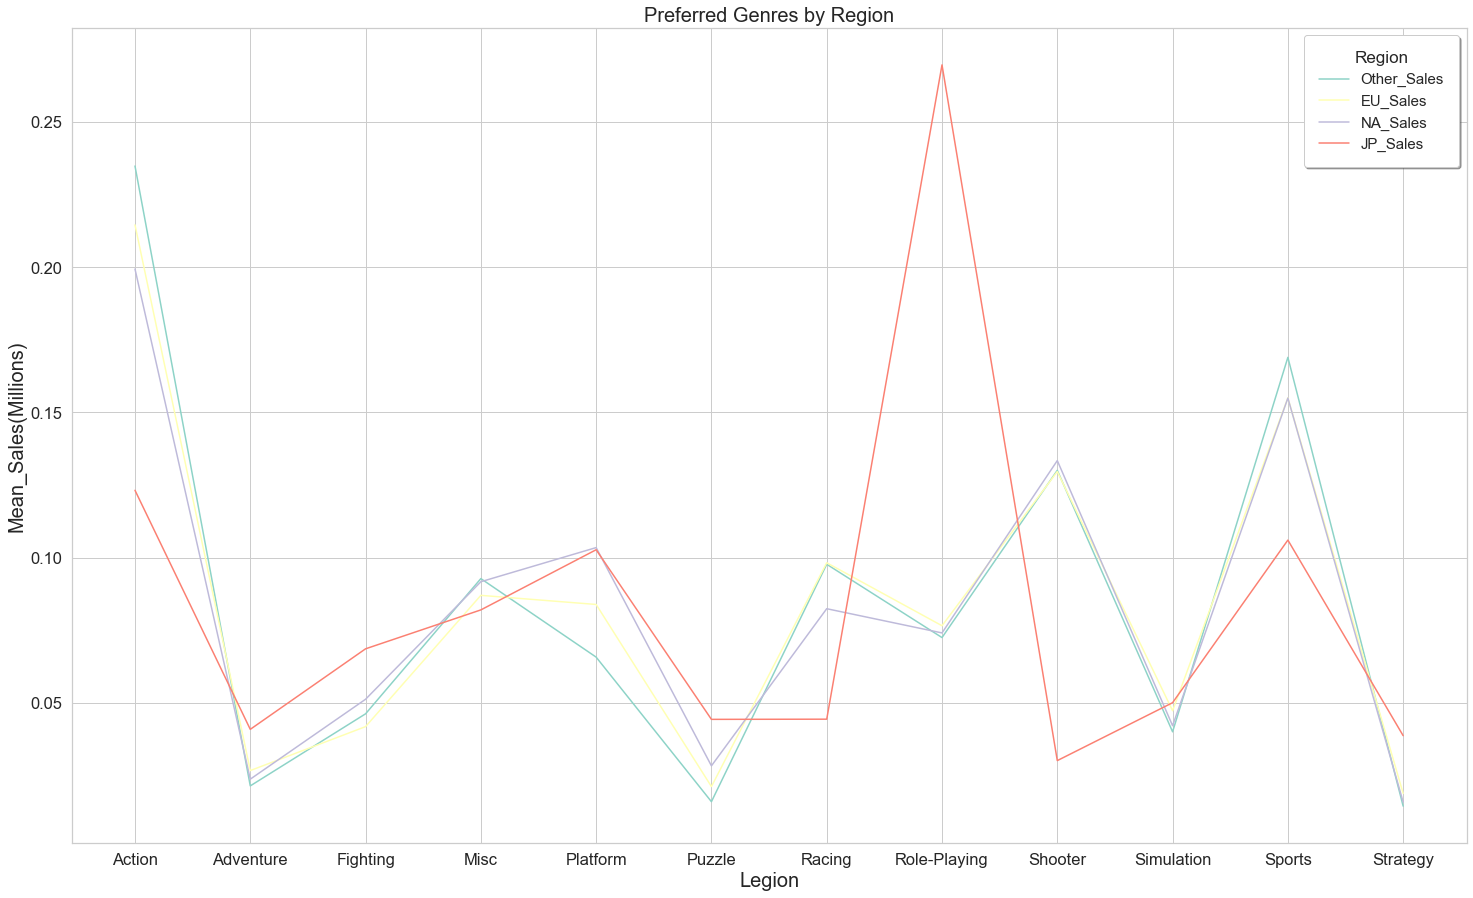

In [ ]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.lineplot(x='Genre',y='Mean_Sales',hue='Region',data=vgame013,
            palette='Set3')
plt.legend(borderpad=1,fontsize=15,frameon=True,shadow=True,
           title='Region',title_fontsize=17)
plt.xlabel("Legion",size=20)
plt.ylabel("Mean_Sales(Millions)",size=20)
plt.title("Preferred Genres by Region",size=20)
plt.tight_layout
plt.savefig('1.png', dpi = 300)
plt.show()

### 최근 10년 동안 지역에 따라 선호하는 게임의 장르가 다를지 확인

In [ ]:
# 10년 자료

vgame014=vgame_10y.groupby('Genre').sum()
vgame014.drop(['Year'],axis=1, inplace=True)
vgame014=vgame014.reset_index()
vgame014

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,488.75,338.52,93.84,128.25,1049.36
1,Adventure,56.85,35.81,26.54,11.67,130.87
2,Fighting,81.67,39.00,25.65,20.43,166.75
3,Misc,258.88,126.71,45.95,51.91,483.45
4,Platform,112.24,70.79,25.93,23.90,232.86
5,Puzzle,38.89,26.34,9.03,6.51,80.77
6,Racing,112.45,106.11,12.30,36.55,267.41
7,Role-Playing,166.51,97.73,143.07,35.45,442.76
8,Shooter,340.35,225.99,16.96,79.57,662.87
9,Simulation,97.77,62.99,20.83,18.01,199.60


In [ ]:
vgame015=vgame014.T
vgame015=vgame015.rename(columns=vgame015.iloc[0])
vgame015= vgame015.drop(vgame015.index[0])
vgame015=vgame015.drop(['Total_Sales'])
vgame015

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,488.75,56.85,81.67,258.88,112.24,38.89,112.45,166.51,340.35,97.77,322.21,26.52
EU_Sales,338.52,35.81,39.0,126.71,70.79,26.34,106.11,97.73,225.99,62.99,211.3,23.26
JP_Sales,93.84,26.54,25.65,45.95,25.93,9.03,12.3,143.07,16.96,20.83,40.11,13.02
Other_Sales,128.25,11.67,20.43,51.91,23.9,6.51,36.55,35.45,79.57,18.01,82.73,6.44


#### 2-Sample Chi Square Test / 10년

In [ ]:
# 2-sample chi square test
from scipy.stats import chi2_contingency
chi2_contingency(vgame015)[1]

2.1783747161513856e-52

p값이 0에 가까우므로 10년간 지역에따라 선호하는 게임의 장르가 다르다는 결론

In [ ]:
vgame016=pd.DataFrame()

vgame016['Genre']=vgame014['Genre']
vgame016['NA_Sales']=vgame014['NA_Sales']/(vgame014['NA_Sales'].sum())
vgame016['EU_Sales']=vgame014['EU_Sales']/vgame014['EU_Sales'].sum()
vgame016['JP_Sales']=vgame014['JP_Sales']/(vgame014['JP_Sales'].sum())
vgame016['Other_Sales']=vgame014['Other_Sales']/(vgame014['Other_Sales'].sum())
vgame016['Total_Sales']=vgame014['Total_Sales']/(vgame014['Total_Sales'].sum())
vgame016    

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,0.232396,0.248082,0.198297,0.255774,0.236221
1,Adventure,0.027032,0.026243,0.056083,0.023274,0.029460
2,Fighting,0.038833,0.028581,0.054202,0.040744,0.037537
3,Misc,0.123095,0.092858,0.097099,0.103526,0.108829
4,Platform,0.053369,0.051878,0.054794,0.047665,0.052419
5,Puzzle,0.018492,0.019303,0.019082,0.012983,0.018182
6,Racing,0.053469,0.077762,0.025992,0.072893,0.060196
7,Role-Playing,0.079174,0.071621,0.302327,0.070699,0.099669
8,Shooter,0.161833,0.165615,0.035839,0.158689,0.149218
9,Simulation,0.046489,0.046162,0.044017,0.035918,0.044932


In [ ]:
vgame016=vgame016.melt(id_vars='Genre',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])#,'Total_Sales2'])
vgame016 = vgame016.sort_values(by=vgame016.columns[2],ascending=False)
vgame016 = vgame016.sort_values(by=vgame016.columns[0],ascending=True)
vgame016=vgame016.reset_index(drop=True)
vgame016.columns=['Genre','Region','Mean_Sales']
vgame016.head()

,Genre,Region,Mean_Sales
0,Action,Other_Sales,0.255774
1,Action,EU_Sales,0.248082
2,Action,NA_Sales,0.232396
3,Action,JP_Sales,0.198297
4,Adventure,JP_Sales,0.056083


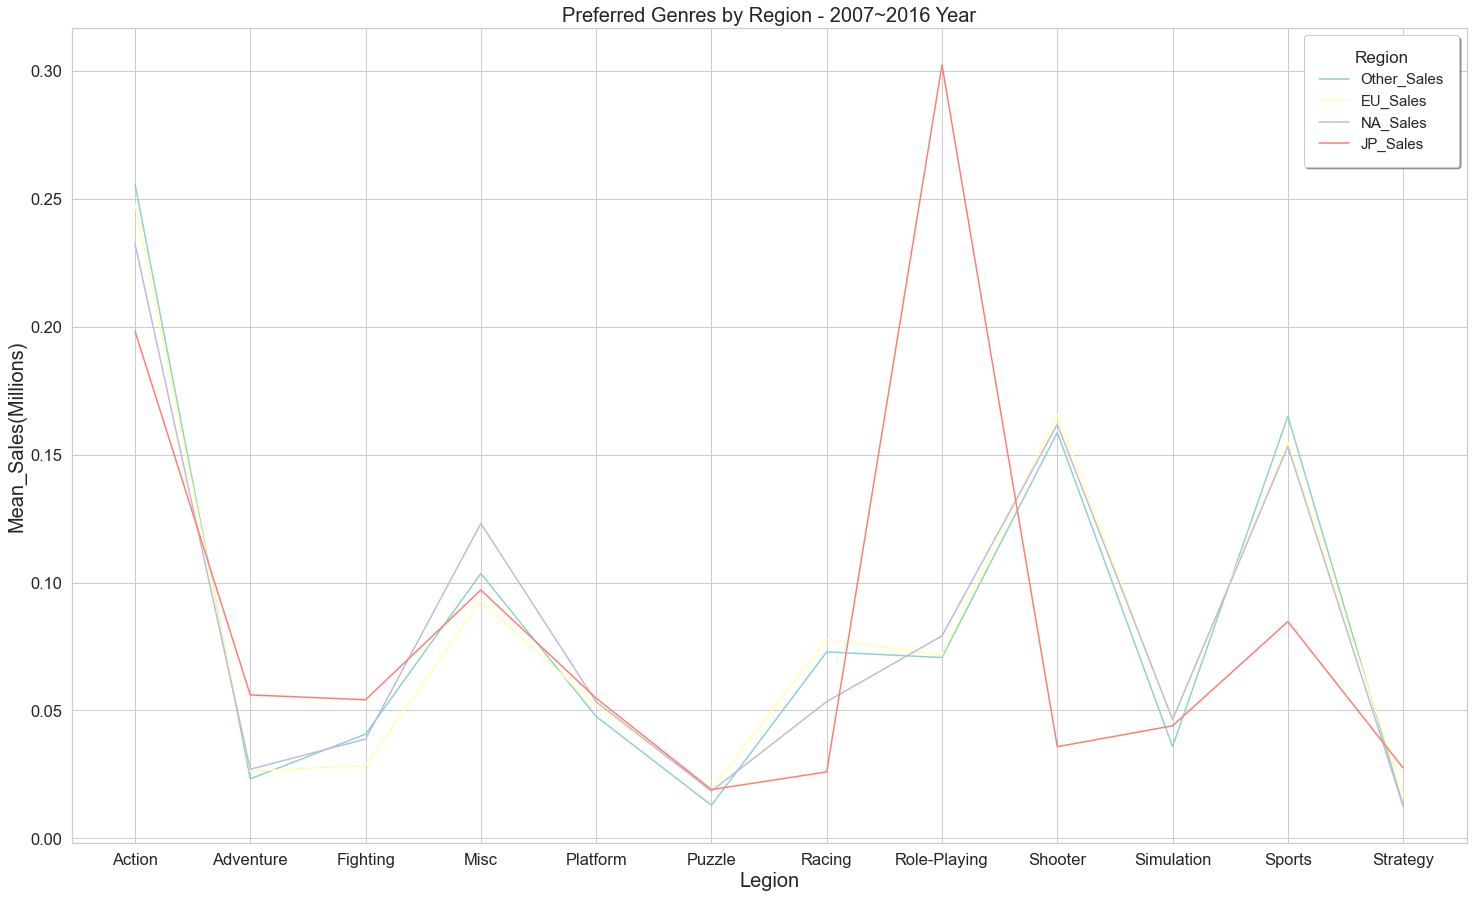

In [ ]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.lineplot(x='Genre',y='Mean_Sales',hue='Region',data=vgame016,
            palette='Set3')
plt.legend(borderpad=1,fontsize=15,frameon=True,shadow=True,
           title='Region',title_fontsize=17)
plt.xlabel("Legion",size=20)
plt.ylabel("Mean_Sales(Millions)",size=20)
plt.title("Preferred Genres by Region - 2007~2016 Year",size=20)
plt.tight_layout
plt.savefig('2.png', dpi = 300)
plt.show()

## 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

### 장르와 연도 트렌드

In [ ]:
#  장르-연도 트렌드

vgame02=vgame.groupby(by=['Year','Genre'])['Total_Sales'].sum().reset_index()


In [ ]:
vgame02.head(10)

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
5,1981,Platform,6.92
6,1981,Puzzle,2.25
7,1981,Racing,0.48
8,1981,Shooter,10.02
9,1981,Simulation,0.44


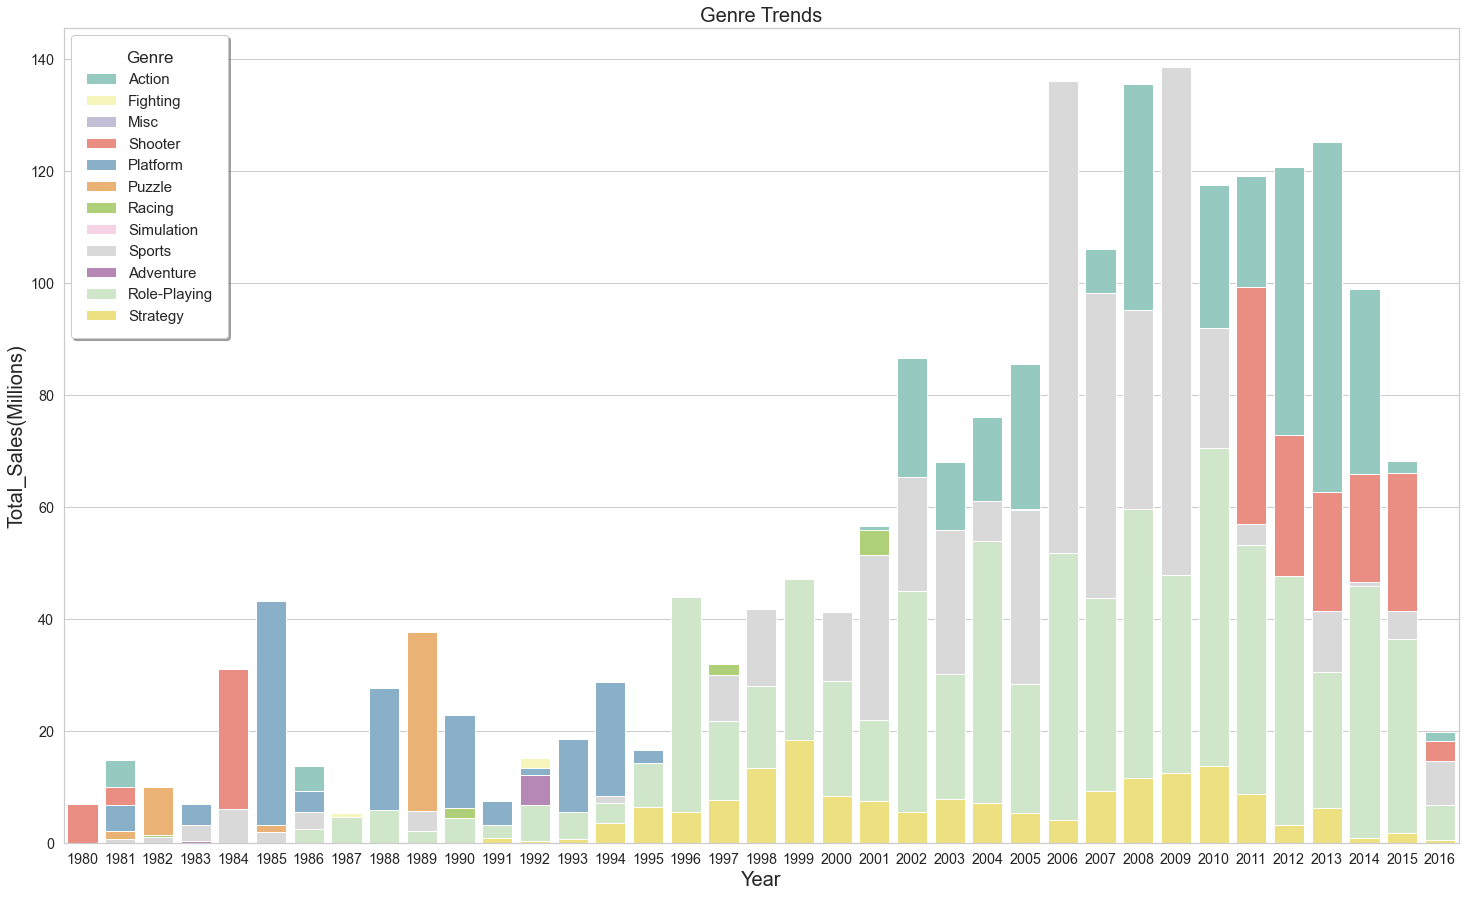

In [ ]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.barplot(data=vgame02,x='Year',y='Total_Sales',dodge=False,hue='Genre',palette='Set3')
plt.legend(borderpad=1,fontsize=15,frameon=True,shadow=True,
           title='Genre',title_fontsize=17,loc=2)
plt.xlabel("Year",size=20)
plt.ylabel("Total_Sales(Millions)",size=20)
plt.title("Genre Trends",size=20)
plt.tight_layout
plt.savefig('3.png', dpi = 300)
plt.show()

In [ ]:
#ANOVA TEST
import statsmodels.api as sm
from statsmodels.formula.api import ols

model01 = ols('Total_Sales ~ C(Genre)', data=vgame02).fit()
anova_table01 = sm.stats.anova_lm(model01)
anova_table01

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,54585.903717,4962.354883,8.009081,1.459972e-12
Residual,373.0,231107.447352,619.591012,NaN,NaN


연도별로 장르 트렌드는 없다는 가설이 p값이 0에 가까우므로 기각되어 연도별로 장르의 트렌드는 있다고 할수있다

### 플랫폼과 연도 트렌드

In [ ]:
# 플랫폼 - 연도 판매량
vgame021=vgame.groupby(by=['Year','Platform'])['Total_Sales'].sum().reset_index()
vgame021.head(10)


,Year,Platform,Total_Sales
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
5,1984,2600,0.27
6,1984,NES,50.08
7,1985,2600,0.45
8,1985,NES,53.44
9,1985,PC,0.04


In [ ]:
#ANOVA TEST

model02 = ols('Total_Sales ~ C(Platform)', data=vgame021).fit()
anova_table02 = sm.stats.anova_lm(model02)
anova_table02

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),30.0,245439.195793,8181.306526,5.396331,6.474281e-14
Residual,206.0,312313.869884,1516.086747,NaN,NaN


p값이 0에 가까우므로 연도별로 플랫폼의 트렌드는 없다는 결론 도출

## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

### 전체기간 순위

In [ ]:
# 출고량이 높은 게임

vgame03=vgame.groupby(['Name']).sum()

In [ ]:
vgame03=vgame03.sort_values('Total_Sales',ascending=False)
vgame03.head(20)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,
Wii Sports,2006,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,10069,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,3984,32.48,4.88,6.96,0.99,45.31
Tetris,3977,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.83
Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.38
Call of Duty: Modern Warfare 3,8044,15.58,11.29,0.62,3.35,30.84
New Super Mario Bros.,2006,11.38,9.23,6.50,2.90,30.01


In [ ]:
vgame03=vgame.sort_values('Year', ascending=True)
vgame03=vgame03.sort_values('Name', ascending=True)
vgame03=vgame03.reset_index(drop=True)
vgame03

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
16231,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
16232,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
16233,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
16234,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [ ]:
# 플랫폼에 따라 같은 게임이라도 출시연도가 다르기 때문에 가장 초기 출시연도로 변경
vgame031=vgame03


In [ ]:

for i in range(len(vgame031)):
    if i >=1:
        if vgame031['Name'][i]==vgame031['Name'][i-1]:
            vgame031['Year'][i]=vgame031['Year'][i-1].copy()
vgame031

/var/folders/vw/m6ndnyx12txdf_c8xzfnlbkm0000gn/T/ipykernel_14323/3092477963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgame031['Year'][i]=vgame031['Year'][i-1].copy()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
16231,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
16232,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
16233,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
16234,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [ ]:
vgame031=vgame031.groupby(['Name','Year','Genre']).sum()
vgame031=vgame031.sort_values('Total_Sales',ascending=False)
vgame031=vgame031.reset_index(drop=False)
vgame031.head(20)

,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,2006,Sports,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,2013,Action,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,1999,Platform,32.48,4.88,6.96,0.99,45.31
3,Tetris,1989,Puzzle,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,2009,Sports,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38
7,Call of Duty: Modern Warfare 3,2011,Shooter,15.58,11.29,0.62,3.35,30.84
8,New Super Mario Bros.,2006,Platform,11.38,9.23,6.50,2.90,30.01
9,Call of Duty: Black Ops II,2012,Shooter,14.08,11.05,0.72,3.88,29.73


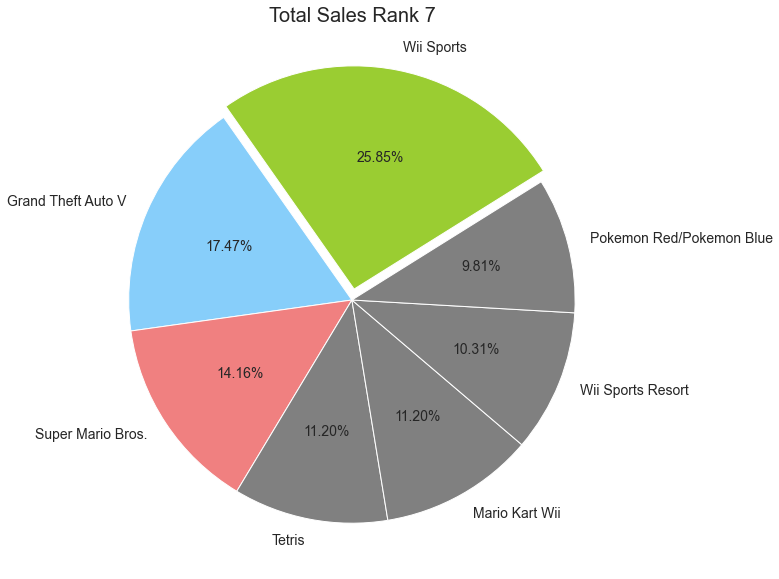

In [ ]:
# 7위까지 파이 차트
vgame031_names=vgame031.head(7).Name
vgame031_value=vgame031.head(7).Total_Sales
explode=(0.05,0.,0.,0,0,0,0)
color=['yellowgreen', 'lightskyblue', 'lightcoral','gray','gray','gray','gray']
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.pie(vgame031_value, 
        labels=vgame031_names, 
        autopct='%1.2f%%',
        startangle=32,
        textprops={'fontsize': 14},
        colors=color,
        explode=explode) 
plt.title("Total Sales Rank 7",size=20)
plt.tight_layout
plt.savefig('4.png', dpi = 300)

plt.show()

### 10년(2007~2016) 동안 게임 판매량 순위

In [ ]:
# 출시 연도를 첫번째 출시 플랫폼으로 변경

vgame033=vgame_10y.sort_values('Year', ascending=True)
vgame033=vgame033.sort_values('Name', ascending=True)
vgame033=vgame033.reset_index(drop=True)
vgame033

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
1,.hack//Link,PSP,2010,Role-Playing,Namco Bandai Games,0.00,0.00,0.14,0.00,0.14
2,.hack: Sekai no Mukou ni + Versus,PS3,2012,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
3,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14,1.49
4,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...
9157,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
9158,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
9159,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
9160,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [ ]:
for i in range(len(vgame033)):
    if i >=1:
        if vgame033['Name'][i]==vgame033['Name'][i-1]:
            vgame033['Year'][i]=vgame033['Year'][i-1].copy()
vgame033

/var/folders/vw/m6ndnyx12txdf_c8xzfnlbkm0000gn/T/ipykernel_14323/4181971529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgame033['Year'][i]=vgame033['Year'][i-1].copy()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
1,.hack//Link,PSP,2010,Role-Playing,Namco Bandai Games,0.00,0.00,0.14,0.00,0.14
2,.hack: Sekai no Mukou ni + Versus,PS3,2012,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
3,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14,1.49
4,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...
9157,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
9158,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
9159,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
9160,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [ ]:
vgame033=vgame033.groupby(['Name','Year','Genre']).sum()
vgame033=vgame033.sort_values('Total_Sales',ascending=False)
vgame033=vgame033.reset_index(drop=False)
vgame033.head(20)

,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,2014,Action,23.46,23.04,1.39,8.03,55.92
1,Mario Kart Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83
2,Wii Sports Resort,2009,Sports,15.75,11.01,3.28,2.96,33.00
3,Call of Duty: Modern Warfare 3,2011,Shooter,15.58,11.29,0.62,3.35,30.84
4,Call of Duty: Black Ops II,2012,Shooter,14.08,11.05,0.72,3.88,29.73
5,Call of Duty: Black Ops,2010,Shooter,17.01,8.69,0.59,3.12,29.41
6,New Super Mario Bros. Wii,2009,Platform,14.59,7.06,4.70,2.26,28.61
7,Call of Duty: Ghosts,2013,Shooter,14.92,9.05,0.48,2.92,27.37
8,Call of Duty: Black Ops 3,2015,Shooter,11.89,9.56,0.43,3.42,25.30
9,Call of Duty: Modern Warfare 2,2009,Shooter,13.52,8.11,0.46,3.01,25.10


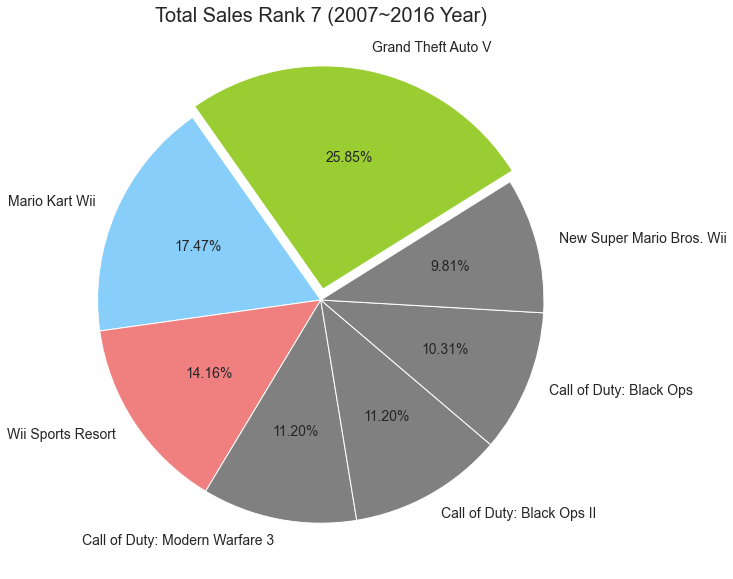

In [ ]:
vgame033_names=vgame033.head(7).Name
vgame033_value=vgame033.head(7).Total_Sales
explode=(0.05,0.,0.,0,0,0,0)
color=['yellowgreen', 'lightskyblue', 'lightcoral','gray','gray','gray','gray']
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.pie(vgame031_value, 
        labels=vgame033_names, 
        autopct='%1.2f%%',
        startangle=32,
        textprops={'fontsize': 14},
        colors=color,
        explode=explode) 
plt.title("Total Sales Rank 7 (2007~2016 Year)",size=20)
plt.tight_layout
plt.savefig('5.png', dpi = 300)

plt.show()

### 2000년 이후로 출시된 게임의 출시 플랫폼수-판매량 관계

In [ ]:
# 2000년 이후 출시된 자료 선택
vgame_y2=((df['Year']>1999) & (df['Year']< 2017)) 
vgame_y2=df[vgame_y2]
vgame_y2=vgame_y2.reset_index(drop=True)

In [ ]:
vgame_y2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
1,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
4,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
...,...,...,...,...,...,...,...,...,...,...
14264,Zombie Hunters 2,PS2,2006,Action,Essential Games,0.00,0.00,0.02,0.00,0.02
14265,J-League Winning Eleven 10 + Europa League 06-07,PS2,2006,Sports,Konami Digital Entertainment,0.00,0.00,0.21,0.00,0.21
14266,StarCraft II: Heart of the Swarm,PC,2013,Strategy,Activision,0.82,0.65,0.00,0.19,1.66
14267,DJ Hero,Wii,2009,Misc,Activision,0.47,0.23,0.00,0.07,0.77


In [ ]:
vgame_y01=vgame_y2.sort_values('Year', ascending=True)
vgame_y01=vgame_y01.sort_values('Name', ascending=True)
vgame_y01=vgame_y01.reset_index(drop=True)
vgame_y01

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
1,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
2,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
3,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
4,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
...,...,...,...,...,...,...,...,...,...,...
14264,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
14265,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
14266,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
14267,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [ ]:
name5=vgame_y01['Name']
name5

0                     .hack//G.U. Vol.1//Rebirth
1                   .hack//G.U. Vol.2//Reminisce
2        .hack//G.U. Vol.2//Reminisce (jp sales)
3                  .hack//G.U. Vol.3//Redemption
4                        .hack//Infection Part 1
                          ...                   
14264                 thinkSMART: Chess for Kids
14265                               uDraw Studio
14266               uDraw Studio: Instant Artist
14267               uDraw Studio: Instant Artist
14268               ¡Shin Chan Flipa en colores!
Name: Name, Length: 14269, dtype: object

In [ ]:
p_c=[]
for i in name5 :
    x="(Name==@i)"
    p_c.append(vgame.query(x)['Platform'].count())

p_c


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,


In [ ]:
vgame_y01=vgame_y01.assign(Platform_Count=p_c)
vgame_y01

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Count
0,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,1
1,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,1
2,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,1
3,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,1
4,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26,1
...,...,...,...,...,...,...,...,...,...,...,...
14264,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01,1
14265,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45,1
14266,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02,2
14267,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19,2


In [ ]:
print(vgame_y01.loc[vgame_y01['Platform_Count']==0])

Empty DataFrame
Columns: [Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Total_Sales, Platform_Count]
Index: []


In [ ]:
# 플랫폼수 - 평균 판매량
vgame_y02=vgame_y01.groupby(by=['Platform_Count'])['Total_Sales'].mean()
vgame_y02=pd.DataFrame(vgame_y02)
vgame_y02.rename(columns={'Total_Sales':'Mean_Sales'},inplace=True)
vgame_y02

,Mean_Sales
Platform_Count,
1,0.433962
2,0.416174
3,0.528611
4,0.642758
5,0.806599
6,0.745205
7,0.735821
8,0.905545
9,1.164444


In [ ]:
from scipy.stats import chisquare  
print('P-value = ',chisquare(vgame_y02, axis=None)[1])

P-value =  0.9996968281109218


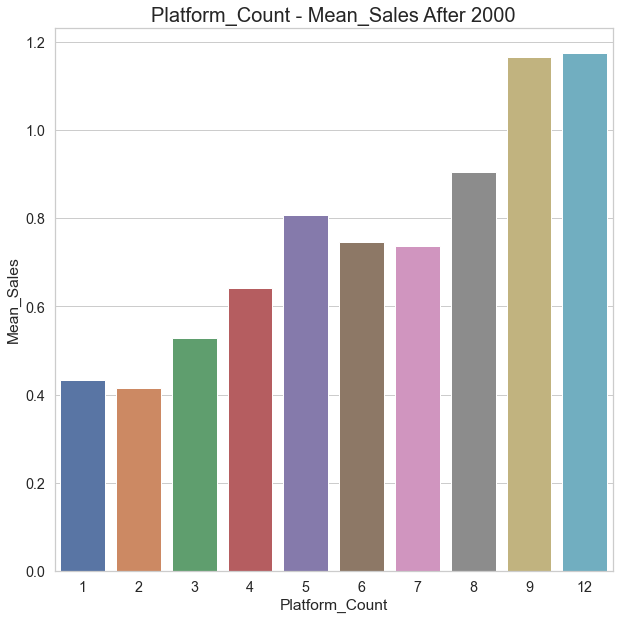

In [ ]:
vgame_y02=vgame_y02.reset_index()
fig=plt.figure(figsize=(10,10))
sns.barplot(x='Platform_Count',y='Mean_Sales',data=vgame_y02)
plt.title("Platform_Count - Mean_Sales After 2000",size=20)
plt.tight_layout
plt.savefig('6.png', dpi = 300)
plt.show()


### 플랫폼 회사 별 판매량

#### 전체기간

In [ ]:
vgame04=vgame.groupby(['Platform'])['Total_Sales'].sum().reset_index()
vgame04.sort_values(by=vgame04.columns[1],ascending=False).head(10).reset_index(drop=True)

,Platform,Total_Sales
0,PS2,1222.44
1,X360,968.59
2,PS3,946.74
3,Wii,900.15
4,DS,816.88
5,PS,725.16
6,GBA,304.76
7,PSP,290.84
8,PS4,275.75
9,GB,254.43


#### 2000년 이후

In [ ]:
vgame05=vgame_y2.groupby(['Platform'])['Total_Sales'].sum().reset_index()
vgame05

,Platform,Total_Sales
0,3DS,231.82
1,DC,7.41
2,DS,816.88
3,GB,29.00
4,GBA,304.76
5,GC,196.02
6,N64,37.21
7,PC,202.92
8,PS,140.66
9,PS2,1222.44


In [ ]:
vgame05['Made']=['Nintendo','Sega','Nintendo','Nintendo','Nintendo','Nintendo','Nintendo','PC',
                 'Sony','Sony','Sony','Sony','Sony','Sony','Bandai','Nintendo','Nintendo','Microsoft','Microsoft','Microsoft']
vgame05

,Platform,Total_Sales,Made
0,3DS,231.82,Nintendo
1,DC,7.41,Sega
2,DS,816.88,Nintendo
3,GB,29.00,Nintendo
4,GBA,304.76,Nintendo
5,GC,196.02,Nintendo
6,N64,37.21,Nintendo
7,PC,202.92,PC
8,PS,140.66,Sony
9,PS2,1222.44,Sony


In [ ]:
vgame06=vgame05.groupby(['Made']).sum().reset_index()
vgame06

,Made,Total_Sales
0,Bandai,0.96
1,Microsoft,1356.97
2,Nintendo,2597.63
3,PC,202.92
4,Sega,7.41
5,Sony,2937.97


In [ ]:
vgame06=vgame06[~vgame06['Made'].str.contains('Sega')]
vgame06=vgame06[~vgame06['Made'].str.contains('Bandai')]
vgame06=vgame06.sort_values(by=vgame06.columns[1],ascending=False).reset_index(drop=True).reset_index(drop=True)
vgame06

,Made,Total_Sales
0,Sony,2937.97
1,Nintendo,2597.63
2,Microsoft,1356.97
3,PC,202.92


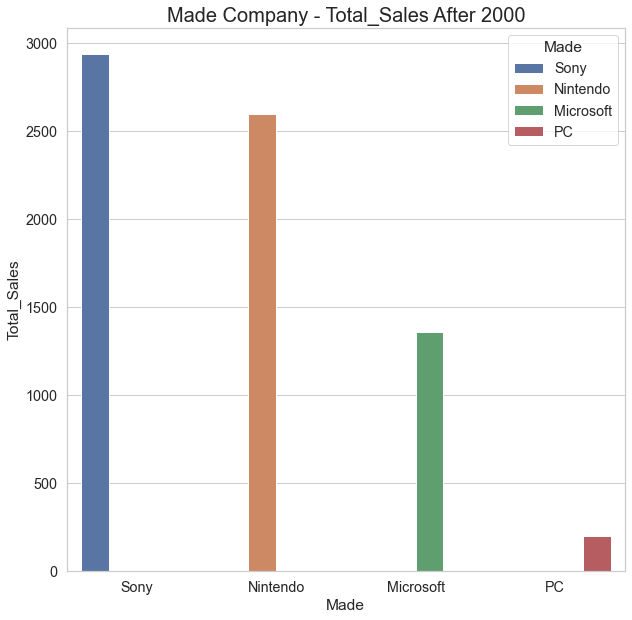

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Made',y='Total_Sales',data=vgame06,hue='Made')
plt.title("Made Company - Total_Sales After 2000",size=20)
plt.tight_layout
plt.savefig('8.png', dpi = 300)
plt.show()

In [ ]:
vgame07=vgame_y2.groupby(['Platform'])['Total_Sales'].mean().reset_index()
vgame07.rename(columns={'Total_Sales':'Mean_Sales'},inplace=True)
vgame07

,Platform,Mean_Sales
0,3DS,0.465502
1,DC,0.239032
2,DS,0.384414
3,GB,1.074074
4,GBA,0.388724
5,GC,0.362329
6,N64,0.539275
7,PC,0.226726
8,PS,0.517132
9,PS2,0.576351


In [ ]:
vgame07['Made']=['Nintendo','Sega','Nintendo','Nintendo','Nintendo','Nintendo','Nintendo',
                 'PC','Sony','Sony','Sony','Sony','Sony','Sony','Bandai','Nintendo','Nintendo','Microsoft','Microsoft','Microsoft']
vgame07

,Platform,Mean_Sales,Made
0,3DS,0.465502,Nintendo
1,DC,0.239032,Sega
2,DS,0.384414,Nintendo
3,GB,1.074074,Nintendo
4,GBA,0.388724,Nintendo
5,GC,0.362329,Nintendo
6,N64,0.539275,Nintendo
7,PC,0.226726,PC
8,PS,0.517132,Sony
9,PS2,0.576351,Sony


In [ ]:
# 플랫폼 회사별 게임 평균 판매량 2000년 이후
vgame08=vgame07.groupby(['Made']).mean().reset_index()
vgame08

,Made,Mean_Sales
0,Bandai,0.240000
1,Microsoft,0.587272
2,Nintendo,0.560916
3,PC,0.226726
4,Sega,0.239032
5,Sony,0.507149


In [ ]:
vgame08=vgame08[~vgame08['Made'].str.contains('Sega')]
vgame08=vgame08[~vgame08['Made'].str.contains('Bandai')]
vgame08=vgame08.sort_values(by=vgame08.columns[1],ascending=False).reset_index(drop=True).reset_index(drop=True)
vgame08

,Made,Mean_Sales
0,Microsoft,0.587272
1,Nintendo,0.560916
2,Sony,0.507149
3,PC,0.226726


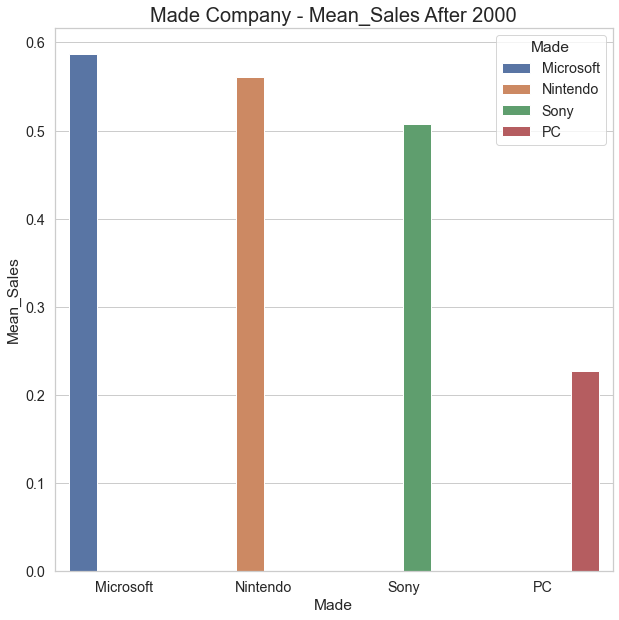

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Made',y='Mean_Sales',data=vgame08,hue='Made')
plt.title("Made Company - Mean_Sales After 2000",size=20)
plt.tight_layout
plt.savefig('9.png', dpi = 300)
plt.show()